In [323]:
import numpy as np
import pandas as pd
import datetime as dt

In [324]:
movie_data = pd.read_csv("IMDbMoviesIndia.csv",encoding='latin-1')

In [325]:
movie_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


## EDA & Data Engineering before we headover to train the model

In [326]:

movie_data.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [327]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [328]:
movie_final=movie_data.dropna()

In [329]:
movie_final.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [330]:
movie_final['Duration'].unique()

array(['109 min', '110 min', '147 min', '142 min', '82 min', '116 min',
       '96 min', '120 min', '161 min', '166 min', '102 min', '87 min',
       '132 min', '105 min', '146 min', '168 min', '158 min', '126 min',
       '94 min', '138 min', '124 min', '144 min', '157 min', '136 min',
       '107 min', '113 min', '80 min', '122 min', '149 min', '148 min',
       '130 min', '121 min', '188 min', '115 min', '103 min', '114 min',
       '170 min', '100 min', '99 min', '140 min', '128 min', '93 min',
       '125 min', '145 min', '75 min', '111 min', '134 min', '104 min',
       '92 min', '137 min', '127 min', '119 min', '135 min', '90 min',
       '150 min', '151 min', '95 min', '112 min', '143 min', '177 min',
       '117 min', '123 min', '72 min', '154 min', '175 min', '153 min',
       '78 min', '139 min', '133 min', '180 min', '46 min', '164 min',
       '162 min', '171 min', '160 min', '152 min', '163 min', '165 min',
       '141 min', '129 min', '156 min', '240 min', '172 min', '88

In [331]:
import seaborn as sns

In [332]:
movie_final.shape

(5659, 10)

In [333]:
movie_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), object(9)
memory usage: 486.3+ KB


In [334]:
movie_final.describe(include='all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,5659,5659,5659,5659,5659.000000,5659,5659,5659,5659,5659
unique,5385,91,174,376,NaN,2027,2431,1960,2321,2556
top,Baazi,(2019),120 min,Drama,NaN,7,David Dhawan,Amitabh Bachchan,Rekha,Pran
freq,4,227,169,844,NaN,90,41,104,52,57
mean,NaN,NaN,NaN,NaN,5.898533,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381165,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.100000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.900000,NaN,NaN,NaN,NaN,NaN


In [335]:
movie_final['Duration'] = movie_final['Duration'].str.replace("min","").astype(int)

/var/folders/p9/k8f841h92px7yw5q25l36bj00000gn/T/ipykernel_15344/2739491484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_final['Duration'] = movie_final['Duration'].str.replace("min","").astype(int)


In [336]:
movie_final['Duration']

1        109
3        110
5        147
6        142
8         82
        ... 
15493    115
15494    153
15503    125
15505    129
15508    130
Name: Duration, Length: 5659, dtype: int64

In [337]:
movie_final['Rating'] = movie_final['Rating'].astype(float)

/var/folders/p9/k8f841h92px7yw5q25l36bj00000gn/T/ipykernel_15344/70414516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_final['Rating'] = movie_final['Rating'].astype(float)


In [338]:
movie_final['Rating']

1        7.0
3        4.4
5        4.7
6        7.4
8        5.6
        ... 
15493    6.1
15494    6.2
15503    5.8
15505    4.5
15508    6.2
Name: Rating, Length: 5659, dtype: float64

In [339]:
movie_final['Votes'] = movie_final['Votes'].str.replace(",","").astype(int)

/var/folders/p9/k8f841h92px7yw5q25l36bj00000gn/T/ipykernel_15344/3037043676.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_final['Votes'] = movie_final['Votes'].str.replace(",","").astype(int)


In [340]:
movie_final['Votes'] 

1           8
3          35
5         827
6        1086
8         326
         ... 
15493     408
15494    1496
15503      44
15505     655
15508      20
Name: Votes, Length: 5659, dtype: int64

In [341]:
movie_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   int64  
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int64  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 486.3+ KB


In [342]:
movie_final['Year']=movie_final['Year'].str.replace("(","").str.replace(')','')


/var/folders/p9/k8f841h92px7yw5q25l36bj00000gn/T/ipykernel_15344/489140943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_final['Year']=movie_final['Year'].str.replace("(","").str.replace(')','')


In [343]:
movie_final['Year']= pd.to_datetime(movie_final.Year,format='%Y').dt.year

/var/folders/p9/k8f841h92px7yw5q25l36bj00000gn/T/ipykernel_15344/3265906884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_final['Year']= pd.to_datetime(movie_final.Year,format='%Y').dt.year


In [344]:
movie_final['Year'].unique()

array([2019, 1997, 2005, 2012, 2014, 2004, 2016, 1991, 2018, 2010, 1958,
       2021, 2017, 2009, 1993, 2002, 2008, 1994, 2007, 2003, 1998, 1979,
       1974, 2015, 2006, 1981, 2020, 1985, 2013, 2011, 1988, 1987, 1999,
       1973, 1968, 1982, 1977, 1950, 1969, 1948, 1990, 1989, 2001, 2000,
       1953, 1978, 1963, 1992, 1976, 1984, 1986, 1966, 1975, 1980, 1967,
       1970, 1952, 1972, 1971, 1964, 1954, 1962, 1957, 1965, 1996, 1995,
       1956, 1955, 1936, 1983, 1951, 1961, 1959, 1949, 1960, 1946, 1940,
       1945, 1938, 1941, 1942, 1935, 1937, 1947, 1931, 1933, 1943, 1944,
       1932, 1939, 1934], dtype=int32)

In [345]:
import matplotlib as plt

In [346]:
movie_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   int32  
 2   Duration  5659 non-null   int64  
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int64  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), int32(1), int64(2), object(6)
memory usage: 464.2+ KB


In [347]:
movie_final.groupby('Director')['Rating'].mean().sort_values(ascending=False)

Director
Saif Ali Sayeed     10.0
Sriram Raja          9.7
Munni Pankaj         9.4
Suhrud Godbole       9.4
Arvind Pratap        9.4
                    ... 
Navin Batra          1.9
Raajeev Walia        1.8
Stanley D'Costa      1.8
Pramod Mandloi       1.7
Sachindra Sharma     1.6
Name: Rating, Length: 2431, dtype: float64

<Axes: xlabel='Year', ylabel='Votes'>

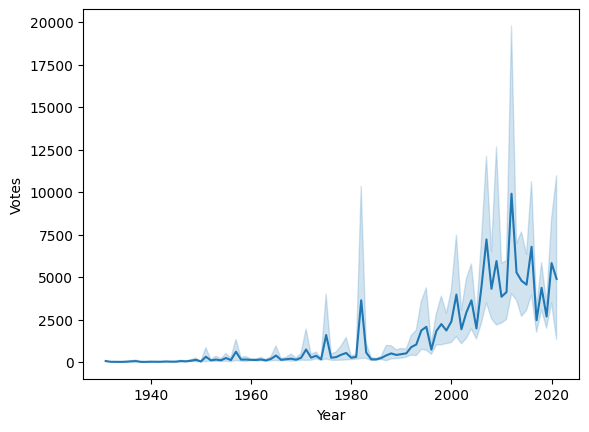

In [348]:
sns.lineplot(x = "Year", y = "Votes", 
             data = movie_final) 
  

In [349]:
movie_final.nlargest(10, 'Duration')[['Name', 'Duration']]

,Name,Duration
4902,Gangs of Wasseypur,321
1345,Athidhi,300
8251,LOC: Kargil,255
14854,Vidhyaarthi: The Power of Students,250
6553,Janwar,247
490,Aasma: The Sky Is the Limit,240
14809,Veera,240
14938,Vivekananda,240
12365,Sangam,238
13713,Taj Mahal: A Monument of Love,235


In [350]:
movie_final.nlargest(10, 'Votes')[['Name', 'Votes']]

,Name,Votes
8219,Life of Pi,591417
75,3 Idiots,357889
8233,Lion,220526
4848,Gandhi,220118
14038,The Darjeeling Limited,185127
8228,Like Stars on Earth,175810
10882,PK,168150
3410,Dangal,165074
11463,Radhe,162455
3829,Dil Bechara,117377


In [351]:
movie_final.Year.value_counts()

Year
2019    227
2017    211
2018    202
2015    177
2016    173
       ... 
1931      2
1939      2
1934      2
1933      1
1932      1
Name: count, Length: 91, dtype: int64

In [352]:
movie_final.nlargest(10, 'Rating')[['Name', 'Rating']]

,Name,Rating
8339,Love Qubool Hai,10.0
5410,Half Songs,9.7
5077,Gho Gho Rani,9.4
6852,June,9.4
14222,The Reluctant Crime,9.4
1314,Ashok Vatika,9.3
1729,Baikunth,9.3
5125,God of gods,9.3
8344,Love Sorries,9.3
11843,Refl3ct,9.3


In [353]:
movie_final['Genre'].value_counts()

Genre
Drama                              844
Drama, Romance                     332
Action, Crime, Drama               329
Action, Drama                      206
Comedy, Drama                      205
                                  ... 
Comedy, Crime, Musical               1
History, Romance                     1
Drama, History, Sport                1
Animation, Comedy, Drama             1
Documentary, Biography, Musical      1
Name: count, Length: 376, dtype: int64

In [354]:
movie_final['Director'].value_counts()

Director
David Dhawan            41
Mahesh Bhatt            39
Ram Gopal Varma         33
Hrishikesh Mukherjee    33
Shakti Samanta          33
                        ..
Sriram Raja              1
Randeep Jha              1
Vicky Bhardwaj           1
Salar Shaikh             1
Mozez Singh              1
Name: count, Length: 2431, dtype: int64

In [355]:
movie_final['Actor 1'].value_counts()

Actor 1
Amitabh Bachchan      104
Mithun Chakraborty     93
Ashok Kumar            91
Dharmendra             90
Jeetendra              89
                     ... 
Murad Ali               1
Amarjeet                1
Rinku Jaiswal           1
Usha Kiran              1
Darsheel Safary         1
Name: count, Length: 1960, dtype: int64

In [356]:
movie_final['Actor 2'].value_counts()

Actor 2
Rekha                 52
Hema Malini           48
Mithun Chakraborty    38
Dharmendra            38
Akshay Kumar          34
                      ..
Sanjana Tiwari         1
Divya Chouksey         1
Suchendra Prasad       1
Sid Makkar             1
Jayamalini             1
Name: count, Length: 2321, dtype: int64

In [357]:
movie_final['Actor 3'].value_counts()

Actor 3
Pran                  57
Anupam Kher           51
Prem Chopra           32
Paresh Rawal          30
Mithun Chakraborty    29
                      ..
Benyamin Bahadori      1
Makarand Anaspure      1
Shloka Pandit          1
Anandee Tripathi       1
Shatakshi Gupta        1
Name: count, Length: 2556, dtype: int64

/var/folders/p9/k8f841h92px7yw5q25l36bj00000gn/T/ipykernel_15344/3533383767.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(movie_final['Year'],color='g')
/var/folders/p9/k8f841h92px7yw5q25l36bj00000gn/T/ipykernel_15344/3533383767.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(movie_fi

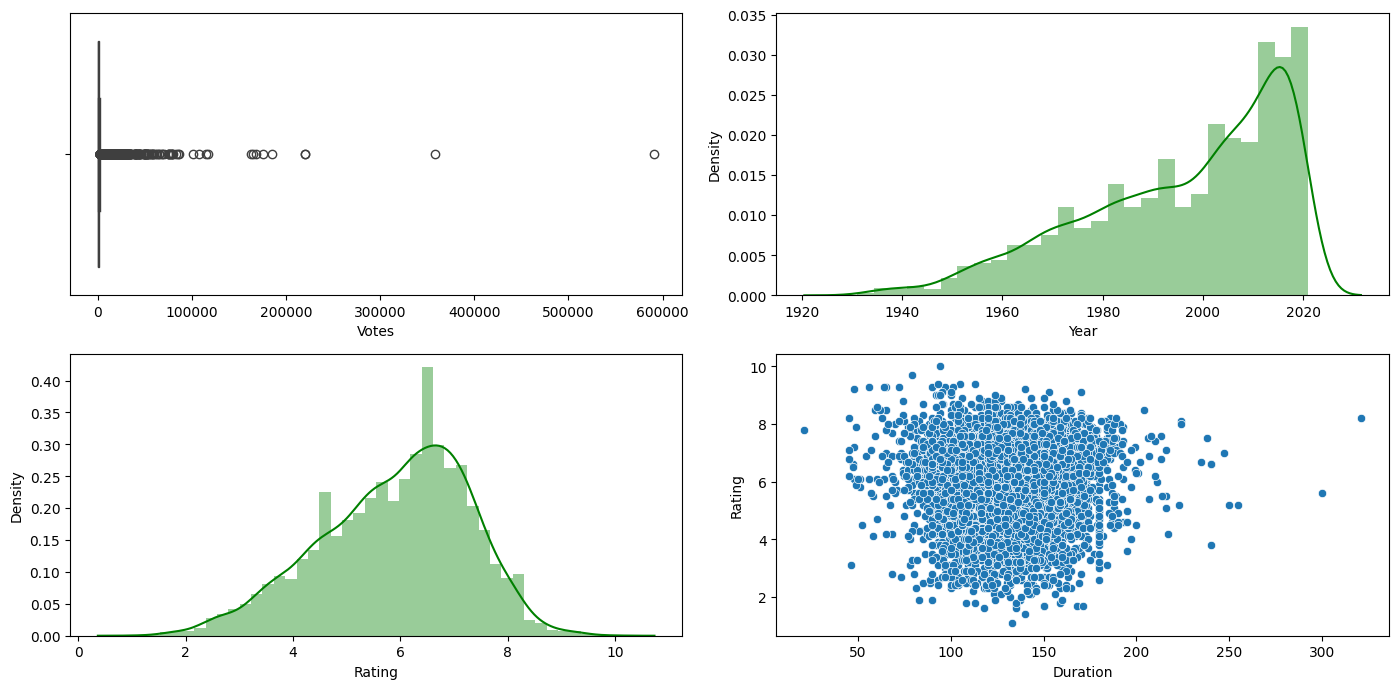

In [358]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
sns.boxplot(x='Votes',data=movie_final)

plt.subplot(2,2,2)
sns.distplot(movie_final['Year'],color='g')

plt.subplot(2,2,3)
sns.distplot(movie_final['Rating'],color='g')

plt.subplot(2,2,4)
sns.scatterplot(x=movie_final['Duration'], y=movie_final['Rating'], data=movie_final)

plt.tight_layout()
plt.show()

# Now we will take first genre only as main genre as there is a list of genres for each movie because one movie may fall under multiple genre

In [359]:
movie_final['main_genre']=movie_final['Genre'].apply(lambda x: x.split(',')[0] if ',' in x else x)

/var/folders/p9/k8f841h92px7yw5q25l36bj00000gn/T/ipykernel_15344/891294195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_final['main_genre']=movie_final['Genre'].apply(lambda x: x.split(',')[0] if ',' in x else x)


In [360]:
movie_final.sample(2)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,main_genre
10179,Night Club,1958,137,"Crime, Drama",6.2,5,Naresh Saigal,Ashok Kumar,Kamini Kaushal,Mubarak,Crime
11004,Prem,1995,167,"Action, Drama, Romance",4.1,220,Satish Kaushik,Sanjay Kapoor,Tabu,Deepak Tijori,Action


In [361]:
movie_final.drop(['Genre'], axis=1, inplace=True)

/var/folders/p9/k8f841h92px7yw5q25l36bj00000gn/T/ipykernel_15344/1007414117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_final.drop(['Genre'], axis=1, inplace=True)


# Now will check correlation among all the features to decide which we can drop

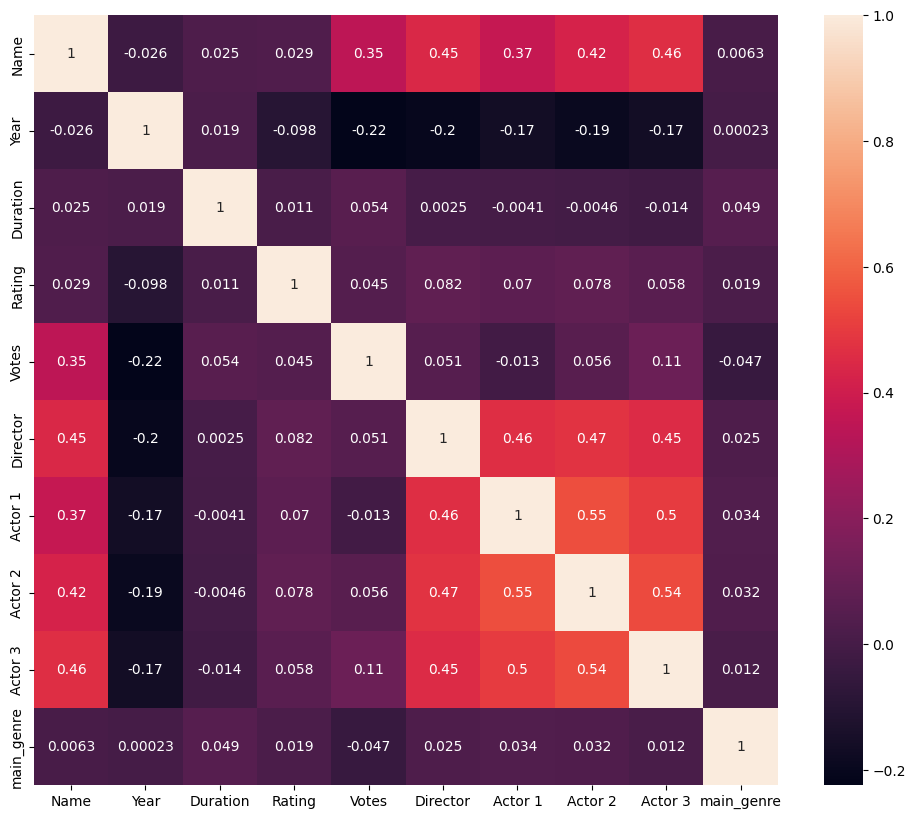

In [363]:
plt.figure(figsize=(12,10))
sns.heatmap(movie_final.apply(lambda x: x.factorize()[0]).corr(),annot=True)
plt.show()

In [364]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [411]:
# Split data into features and target variable
X = movie_final.drop(['Name','Rating','Duration'], axis=1)
y = movie_final['Rating']

In [412]:
y=y.dropna()

In [413]:
y.info()

<class 'pandas.core.series.Series'>
Index: 5659 entries, 1 to 15508
Series name: Rating
Non-Null Count  Dtype  
--------------  -----  
5659 non-null   float64
dtypes: float64(1)
memory usage: 88.4 KB


In [385]:
X

,Year,Votes,Director,Actor 1,Actor 2,Actor 3,main_genre
1,2019,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Drama
3,2019,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Comedy
5,1997,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,Comedy
6,2005,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,Drama
8,2012,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,Horror
...,...,...,...,...,...,...,...
15493,2015,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana,Drama
15494,2001,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee,Biography
15503,1989,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,Action
15505,1999,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,Action


In [386]:
columns_to_encode = ['Director','Actor 1','Actor 2','Actor 3','main_genre']

X_new = pd.get_dummies(X, columns=columns_to_encode)

In [405]:
X_new.describe(include=all)

,Year,Votes,Director_A. Bhimsingh,Director_A. Jagannathan,Director_A. Majid,Director_A. Muthu,Director_A. Salaam,Director_A. Shamsheer,Director_A. Veerappan,Director_A.C. Trilogchander,...,main_genre_History,main_genre_Horror,main_genre_Music,main_genre_Musical,main_genre_Mystery,main_genre_Romance,main_genre_Sci-Fi,main_genre_Sport,main_genre_Thriller,main_genre_War
count,5659.000000,5659.000000,5659,5659,5659,5659,5659,5659,5659,5659,...,5659,5659,5659,5659,5659,5659,5659,5659,5659,5659
unique,NaN,NaN,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,NaN,NaN,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,NaN,NaN,5645,5656,5658,5658,5655,5657,5658,5656,...,5651,5531,5656,5569,5600,5500,5655,5657,5570,5656
mean,1996.247570,2697.649585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,19.741839,13651.503584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1931.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1983.000000,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2002.000000,131.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2013.000000,922.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [407]:
X_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Columns: 9290 entries, Year to main_genre_War
dtypes: bool(9288), int32(1), int64(1)
memory usage: 50.2 MB


In [408]:
X_new=X_new.dropna()

In [381]:
from sklearn.feature_selection import SelectKBest, f_classif

# Will select top k features based on ANOVA F-statistic because hot encoding resulted in high dimension data

In [414]:
selector = SelectKBest(score_func=f_classif, k=5)
X_new1 = selector.fit_transform(X_new, y)

/Users/umair/miniconda3/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


## keeping the most significant features only to lower the dimensionality of data

In [415]:
from sklearn.decomposition import PCA

In [504]:
pca = PCA(n_components=5)  # Set the number of components you want to keep
X_pca = pca.fit_transform(X_new1)

In [505]:
X_pca

array([[-3.05961901e-04, -2.50037688e-04, -6.31391503e-17,
         1.04101367e-13, -5.14872625e-35],
       [-3.05961901e-04, -2.50037688e-04, -2.31075174e-17,
        -1.49964693e-20,  1.37013847e-26],
       [-3.05961901e-04, -2.50037688e-04,  1.30752374e-13,
         5.02631125e-17,  2.42055349e-30],
       ...,
       [-3.05961901e-04, -2.50037688e-04, -6.64140670e-21,
        -6.11508486e-21, -1.06929469e-33],
       [-3.05961901e-04, -2.50037688e-04, -6.64140670e-21,
        -6.11508486e-21, -1.06929469e-33],
       [-3.05961901e-04, -2.50037688e-04, -6.64140670e-21,
        -6.11508486e-21, -1.06929469e-33]])

In [506]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [536]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.50, random_state=42)

In [537]:
# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [538]:
# Make predictions
y_pred = model.predict(X_test)

In [539]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 1.0920472794280809


In [443]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [453]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.50, random_state=42)

In [482]:
# Create a Lasso regression model
lasso_model = Lasso(alpha=0.0003r2 = r2_score(actual_values, predicted_values)
print("R-squared score:", r2))  # You can adjust the alpha parameter

In [483]:
# Train the model
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.0003)

In [484]:
# Make predictions
y_pred = lasso_model.predict(X_test)

In [485]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 1.0920497959231592


In [486]:
print('train dataset mean squared error:', mean_squared_error(y_test, y_pred))

train dataset mean squared error: 1.8067148325652862
